In [1]:
import pandas as pd
import math
import numpy as np
import sklearn
from scipy import stats
from sklearn.base import BaseEstimator
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,r2_score
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable

%matplotlib inline

In [2]:
x=pd.read_csv("^GSPC.csv", parse_dates=True)["Open"]
y=pd.read_csv("KO1.csv", parse_dates=True)["Open"]

In [3]:
x.head()

0    1171.229980
1    1188.579956
2    1087.300049
3    1031.099976
4    1107.530029
Name: Open, dtype: float64

In [4]:
x.describe()

count     121.000000
mean     2008.226021
std       601.172559
min      1031.099976
25%      1412.199951
50%      2018.209961
75%      2476.959961
max      3244.669922
Name: Open, dtype: float64

In [5]:
y.head()

0    27.680000
1    26.855000
2    25.559999
3    25.150000
4    27.910000
Name: Open, dtype: float64

In [6]:
y.describe()

count    121.000000
mean      41.050868
std        6.469166
min       25.150000
25%       37.880001
50%       41.500000
75%       44.599998
max       58.750000
Name: Open, dtype: float64

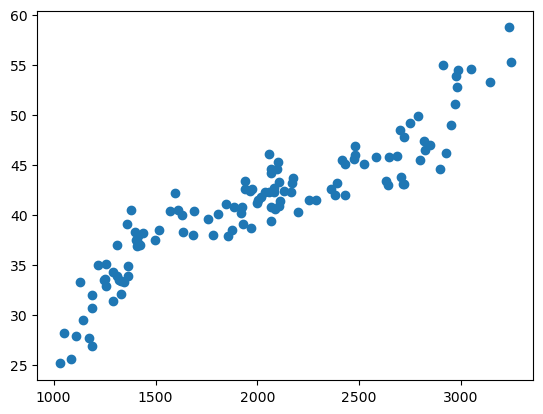

In [7]:
plt.scatter(x,y)

#### (A) Використовуючи комп'ютерне програмне забезпечення для виконання регресійних розрахунків 𝑥 = 𝑟𝑚, 𝑦 = 𝑟𝑝 оцініть за допомогою нелінійних регресії параметри для компанії.

In [8]:
def exp_1(x,a,b):
    return a * np.power(b,x)

def exp_2(x,a,b):
    return a * np.exp(b*x)

def exp_3(x,a,b):
    return np.exp(a+b*x)

def exp_4(x,a,b):
    return np.power(10,a+b*x)

def mult(x,a,b):
    return a * x**b

def invrs(x,a,b):
    return a+b/x

In [9]:
res_data=PrettyTable(['Функція','R^2', 'r','F'])

In [10]:
class Model(BaseEstimator):
    def __init__(self):
        super(Model,self).__init__()
        
    def fit(self,X,y=None):
        self.r_,_ = pearsonr(X,y)
        
        self.b = self.r_*(y.std())/X.std()
        self.a = y.mean() - X.mean()*self.b
        return self
        
    def predict(self,X,y=None):       
        return self.a + X*self.b
    
    def coef_(self):
        return self.a,self.b
    
    @staticmethod
    def r_squared(y,y_pred):
        return np.var(y_pred)/np.var(y)
  
    @staticmethod
    def f_statistic(y,y_pred):
        n=y.shape[0]
        R_2 = r2_score(y,y_pred)
        return (R_2*(n-2))/((1-R_2))
    
    @staticmethod
    def su_squared(y,y_pred):
        n,e = y.shape[0],y-y_pred 
        return n*np.var(e)/(n-2)

    @staticmethod
    def sp_y_pred(x,y,y_pred):
        mean, var,n = x.mean(), x.var(),x.shape[0]
        su_2 = Model.su_squared(y,y_pred)

        b_ = n+1+(x-mean)**2/var
        return np.sqrt(su_2*b_/n)

    @staticmethod
    def calculate_sp(X,y,y_pred):   
        sp_dict = {}
        
        n,mean,var = y.shape[0],X.mean(),np.var(X)
        
        su_2 = Model.su_squared(y,y_pred)
        sp_dict['su_squared']=su_2
        
        sp_dict['slope'] = np.sqrt(su_2/(n*var))
        sp_dict['intercept'] = np.sqrt(su_2*(1+mean**2/var)/n)
        sp_dict['y_pred'] = Model.sp_y_pred(X,y,y_pred)
    
        return sp_dict
    

def calculate_conf_int(val,sp_dict,key,t_crit):
    return val - sp_dict[key]*t_crit, val + sp_dict[key]*t_crit


#### (B) Зробіть порівняльну характеристику для всіх моделей;

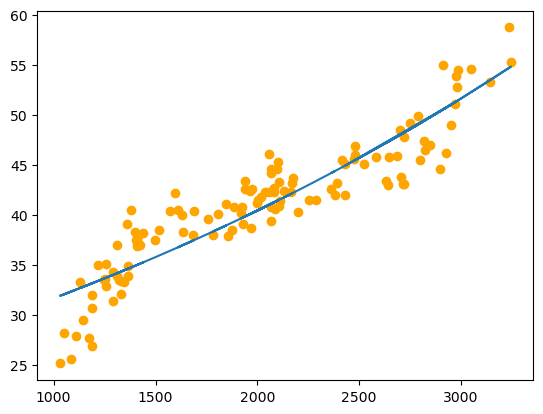

In [11]:
model = Model().fit(x,np.log(y))
ln_a, ln_b = model.coef_()
a,b = np.exp(ln_a),np.exp(ln_b)
y_pr = exp_1(x,np.exp(ln_a),np.exp(ln_b))
plt.scatter(x,y,c='orange')
plt.plot(x,y_pr)
r_sq= r2_score(y,y_pr)
r=pearsonr(y,y_pr)[0]
f_val=model.f_statistic(y,y_pr)
res_data.add_row(["exp_1",r_sq, r, f_val])

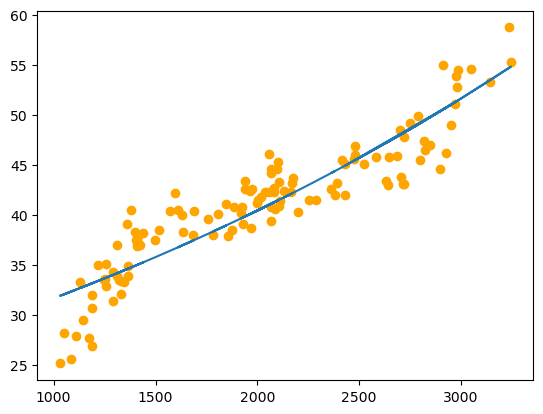

In [12]:
model = Model().fit(x,np.log(y))
a_,b_ = model.coef_()
a,b = np.exp(a_),b_
y_pr = exp_2(x,a,b)
plt.scatter(x,y,c='orange')
plt.plot(x,y_pr)
r_sq= r2_score(y,y_pr)
r=pearsonr(y,y_pr)[0]
f_val=model.f_statistic(y,y_pr)
res_data.add_row(["exp_2",r_sq, r, f_val])

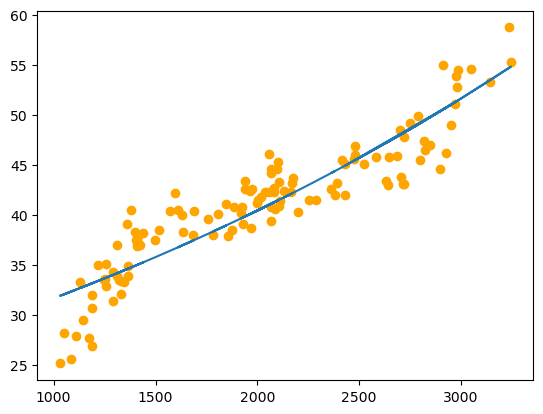

In [13]:
model = Model().fit(x,np.log(y))
a,b = model.coef_()
y_pr = exp_3(x,a,b)
plt.scatter(x,y,c='orange')
plt.plot(x,y_pr)
r_sq= r2_score(y,y_pr)
r=pearsonr(y,y_pr)[0]
f_val=model.f_statistic(y,y_pr)
res_data.add_row(["exp_3",r_sq, r, f_val])

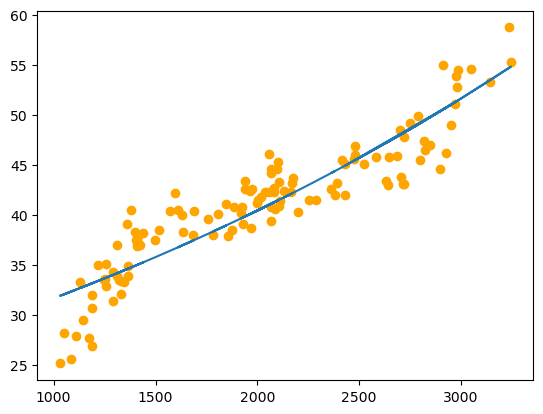

In [14]:
model = Model().fit(x,np.log10(y))
a,b = model.coef_()
y_pr = exp_4(x,a,b)
plt.scatter(x,y,c='orange')
plt.plot(x,y_pr)
r_sq= r2_score(y,y_pr)
r=pearsonr(y,y_pr)[0]
f_val=model.f_statistic(y,y_pr)
res_data.add_row(["exp_4",r_sq, r, f_val])

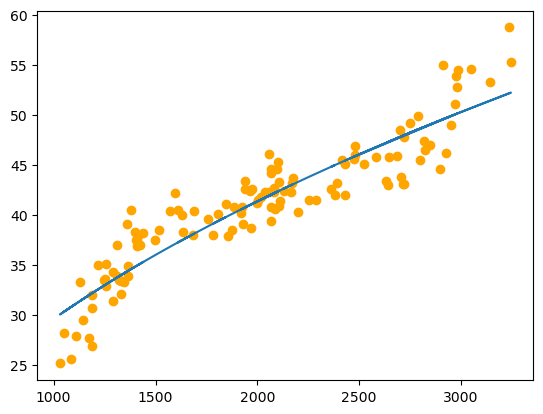

In [15]:
model = Model().fit(np.log(x),np.log(y))
a_,b_ = model.coef_()
a,b = np.exp(a_),b_
y_pr = mult(x,a,b)
plt.scatter(x,y,c='orange')
plt.plot(x,y_pr)
r_sq= r2_score(y,y_pr)
r=pearsonr(y,y_pr)[0]
f_val=model.f_statistic(y,y_pr)
res_data.add_row(["mult",r_sq, r, f_val])

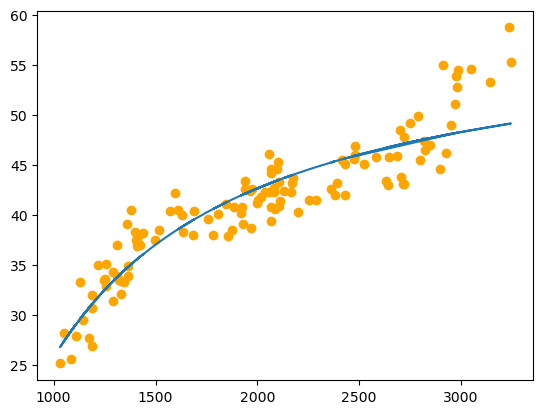

In [16]:
model = Model().fit(1/x,y)
a,b = model.coef_()
y_pr = invrs(x,a,b)
plt.scatter(x,y,c='orange')
plt.plot(x,y_pr)
r_sq= r2_score(y,y_pr)
r=pearsonr(y,y_pr)[0]
f_val=model.f_statistic(y,y_pr)
res_data.add_row(["invrs",r_sq, r, f_val])

In [17]:
print(res_data)

+---------+--------------------+--------------------+-------------------+
| Функція |        R^2         |         r          |         F         |
+---------+--------------------+--------------------+-------------------+
|  exp_1  | 0.8265198700260944 | 0.9098174736324636 | 566.9575215784058 |
|  exp_2  | 0.8265198700260991 | 0.9098174736324655 | 566.9575215784242 |
|  exp_3  | 0.826519870026099  | 0.9098174736324653 | 566.9575215784238 |
|  exp_4  | 0.826519870026099  | 0.9098174736324656 | 566.9575215784238 |
|   mult  | 0.8441310402421681 | 0.9189693598328426 | 644.4618219361065 |
|  invrs  | 0.831684976045284  | 0.9119676398015907 | 588.0075932854107 |
+---------+--------------------+--------------------+-------------------+


Отже, степенева функція показала найкращий результат за всіма критеріями. Показники інших функцій маже не відрізняються між собою і не є ефективними.

#### (C) Оберіть найкращу з моделей і для неї проведіть повний статистичний аналіз.

a: 1.0591089394348674
b: 0.4821814986659417


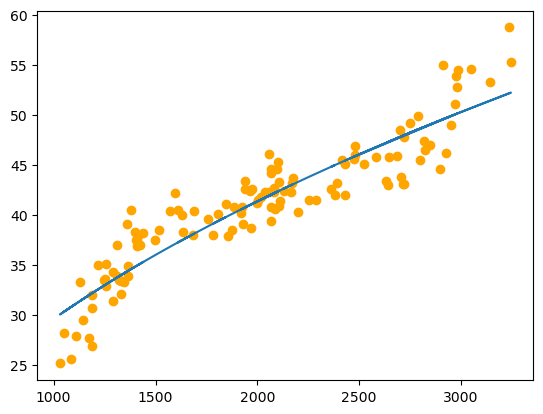

In [18]:
model = Model().fit(np.log(x),np.log(y))
a_,b_ = model.coef_()
a,b = np.exp(a_),b_
y_pr = mult(x,a,b)
plt.scatter(x,y,c='orange')
plt.plot(x,y_pr)
r_sq= r2_score(y,y_pr)
r=pearsonr(y,y_pr)[0]
f_val=model.f_statistic(y,y_pr)
print('a: '+str(a))
print('b: '+str(b))

#### (D) Побудувати довірчий діапазон для регресійних значень 𝑦̂ (з рівнем довіри 95%);

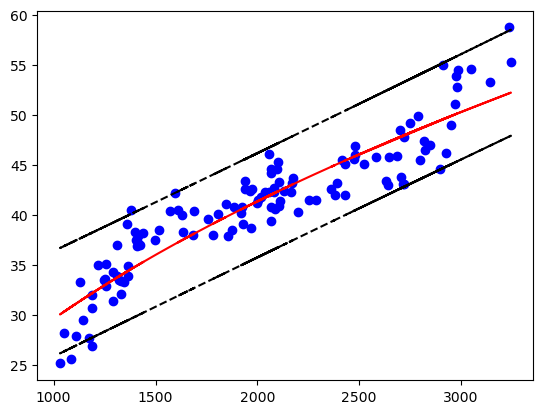

In [19]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table
X = sm.add_constant(x)
model = sm.OLS(y,X)
lin = model.fit()
st, data, ss2 = summary_table(lin, alpha=0.05)
fittedvalues = data[:, 2]
predict_mean_se  = data[:, 3]
predict_mean_ci_low, predict_mean_ci_upp = data[:, 4:6].T
predict_ci_low, predict_ci_upp = data[:, 6:8].T
plt.scatter(x, y, marker = "o", color = "blue")
plt.plot(x, y_pr, color = "red")
plt.plot(x, predict_ci_low, color = "black",linestyle = "--")
plt.plot(x, predict_ci_upp, color = "black",linestyle = "--")
plt.show();

#### (E) Зробіть прогноз на наступний місяць, якщо ринок підніметься на 20% від попереднього місяця, та побудуйте довірчий інтервал.

In [20]:
x_last=x.tail(1)*1.2
y_next_month=mult(x_last,a,b)
print("Predicted: "+str(y_next_month))

Predicted: 120    49.632275
Name: Open, dtype: float64
